In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import transforms, datasets
from torchmetrics import Accuracy

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from functions.dataset import *
# import functions.dataset as d

C:\Users\Shadow\anaconda3\envs\torch_gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_dev_data = CustomDTS("datasets/ECG200_TRAIN.txt")
test_data = CustomDTS("datasets/ECG200_TEST.txt")

In [ ]:
xx = torch.round(torch.Tensor(x), decimals=2)
print(xx)

In [5]:
from torchvision.models import resnet50
t = resnet50()
print(type(t.state_dict()))

<class 'collections.OrderedDict'>


1


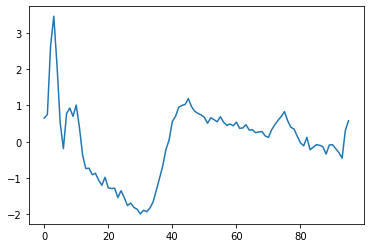

In [14]:
index = 1
print(y)
plt.plot([i for i in range(len(x))], xx)
# plt.plot([i for i in range(len(X[index]))], X[index])
plt.show()

-1


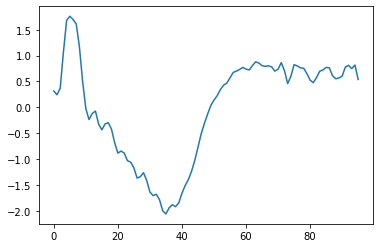

In [6]:
index = 2
print(Y[index])
plt.plot([i for i in range(len(X[index]))], X[index])
plt.show()